In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [41]:
airbnb = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0')

In [3]:
# random_indices = airbnb.sample(n=5000, random_state=42).index
# airbnb.loc[random_indices, 'price'] = np.nan
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

In [42]:
# Remove $ from price before conversion to float
airbnb['price'] = airbnb['price'].str.strip("$")
# Print header to make sure change was done
airbnb['price'].head()

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [43]:
# Convert price to float
airbnb['price'] = airbnb['price'].astype('float')
# Calculate mean of price after conversion
airbnb['price'].mean()

np.float64(150.90512217564665)

In [6]:
# Visualize distribution of prices
# sns.displot(airbnb['price'], bins = 20)
# plt.show()
bins = [0, 50, 100, 200, 500, 1000, np.inf]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+']
price_range = pd.cut(airbnb['price'], bins=bins, labels=labels)
price_range.value_counts().sort_index()

price
0-50        1260
51-100      3512
101-200     3316
201-500     1486
501-1000     152
1000+         53
Name: count, dtype: int64

In [44]:
print(airbnb['room_type'].unique())
airbnb['room_type'] = airbnb['room_type'].str.lower()
airbnb['room_type'] = airbnb['room_type'].str.strip()
mappings = {'private room': 'Private Room', 
            'private': 'Private Room',
            'entire home/apt': 'Entire place',
            'shared room': 'Shared room',
            'home': 'Entire place'}
airbnb['room_type'] = airbnb['room_type'].replace(mappings)
print(airbnb['room_type'].unique())

['Private room' 'Entire home/apt' 'Private' 'Shared room' 'PRIVATE ROOM'
 'home' '   Shared room      ']
['Private Room' 'Entire place' 'Shared room']


In [45]:
borough_neighbourhood = airbnb['neighbourhood_full'].str.split(",", expand = True)
airbnb['borough'] = borough_neighbourhood[0]
airbnb['neighbourhood'] = borough_neighbourhood[1]
airbnb[['neighbourhood_full', 'borough', 'neighbourhood']].head()
airbnb.drop('neighbourhood_full', axis = 1, inplace = True)
airbnb['neighbourhood'] = airbnb['neighbourhood'].str.strip()
print(airbnb['borough'].unique())
print(len(airbnb['neighbourhood'].unique()))

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
198


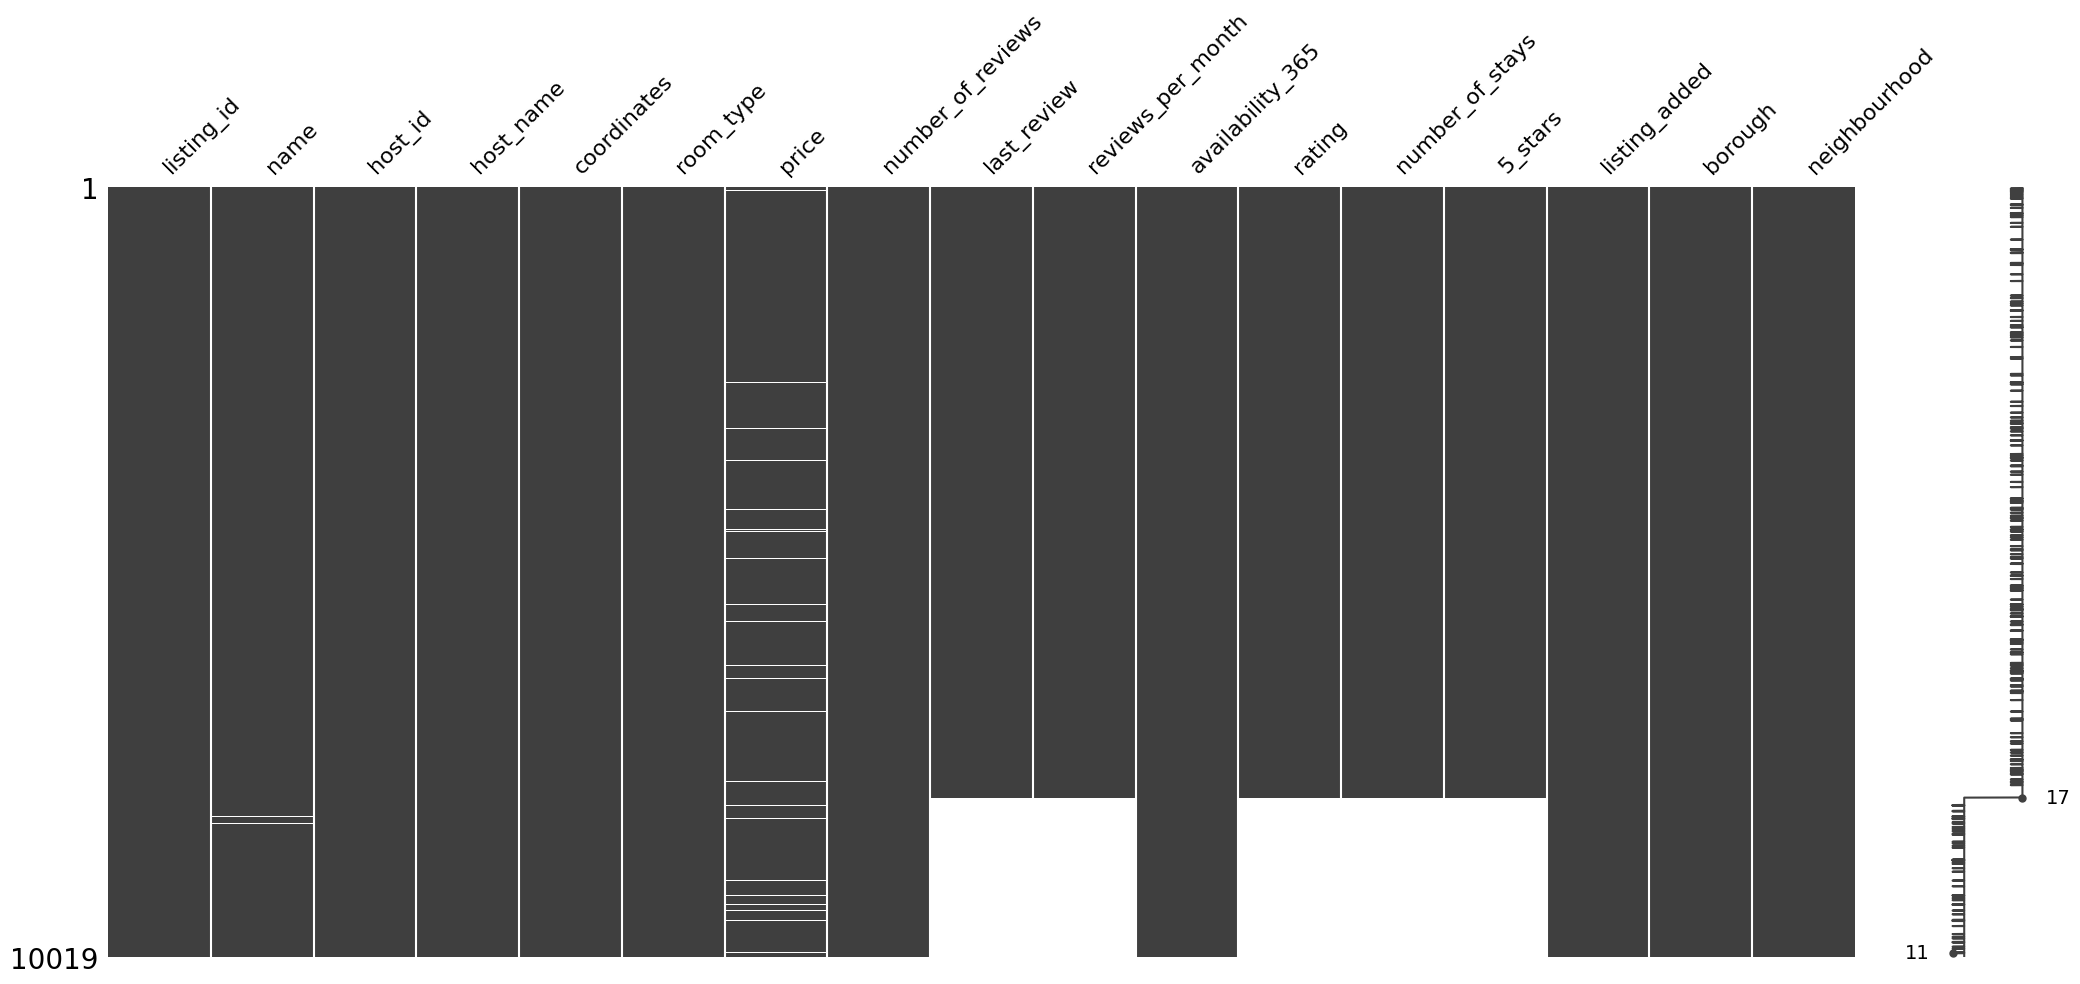

np.int64(238)

In [9]:
msno.matrix(airbnb.sort_values(by = 'rating'))
plt.show()
airbnb['price'].isna().sum()

In [46]:
airbnb = airbnb.fillna({'reviews_per_month':0,
                        'number_of_stays':0,
                        '5_stars':0})

is_rated = np.where(airbnb['rating'].isna() == True, 0, 1)
airbnb['is_rated'] = is_rated

In [36]:
correlation_var = 'borough'

In [12]:
def print_price_bins(): 
    bins = [0, 50, 100, 200, 500, 1000, np.inf]
    labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+']
    price_range = pd.cut(airbnb['price'], bins=bins, labels=labels)
    return price_range.value_counts().sort_index()

In [13]:
print('before: ', print_price_bins()) 
airbnb['price'].isna().sum()

before:  price
0-50        1260
51-100      3512
101-200     3316
201-500     1486
501-1000     152
1000+         53
Name: count, dtype: int64


np.int64(238)

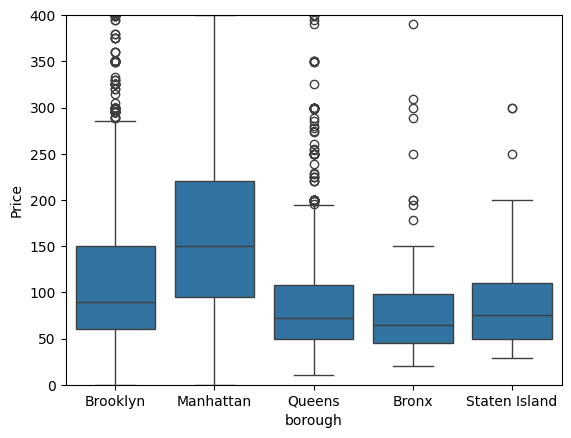

In [37]:
sns.boxplot(x = correlation_var, y = 'price', data = airbnb)
plt.ylim(0, 400)
plt.xlabel(correlation_var)
plt.ylabel('Price')
plt.show()

In [47]:
medians_by_correlation_var = airbnb.groupby(correlation_var)['price'].median()
medians_by_correlation_var

borough
Bronx             65.0
Brooklyn          90.0
Manhattan        150.0
Queens            72.0
Staten Island     75.0
Name: price, dtype: float64

In [39]:
print(correlation_var)
airbnb['price'] = airbnb.apply(
    lambda row: medians_by_correlation_var.get(row[correlation_var], row['price']) if pd.isna(row['price']) else row['price'],
    axis=1
)

borough


In [40]:
print('after: ', print_price_bins())
airbnb['price'].isna().sum()

after:  price
0-50        1260
51-100      3554
101-200     3512
201-500     1486
501-1000     152
1000+         53
Name: count, dtype: int64


np.int64(0)